<a href="https://colab.research.google.com/github/ThousandAI/pycs4001/blob/main/top_youtuber(%E5%AD%B8%E7%94%9F%E4%BD%9C%E5%93%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# data source: https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data
# loading data
df = pd.read_csv('/content/drive/MyDrive/pycs4001_project1/Top YouTube Channels Data.csv')
# we want to see all 7 columns
pd.set_option('display.max_columns', 7)
# print out first 5 samples from the data
df.head(5)

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
1,2,YouTube Movies,150000000,"167,122,746,349",NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
3,4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
4,5,Music,116000000,"78,437,871,689",NaN,Music,2013


In [ ]:
# we don't need rank
df = df.drop(columns=['rank'])
# we want to know views per subscriber
df['video views'] = df['video views'].str.replace(',','').astype(int)
df['views per subscriber'] = df['video views'] / df['subscribers']
df.head(5)

,youtuber,subscribers,video views,video count,category,started,views per subscriber
0,T-Series,213000000,188073919029,16708.0,Music,2006,882.976146
1,YouTube Movies,150000000,167122746349,NaN,Film & Animation,2015,1114.151642
2,Cocomelon - Nursery Rhymes,133000000,126822520940,751.0,Education,2006,953.552789
3,SET India,131000000,101541977714,78334.0,Shows,2006,775.129601
4,Music,116000000,78437871689,NaN,Music,2013,676.188549


In [ ]:
# some statistical properties
df.describe()

,subscribers,video views,video count,started,views per subscriber
count,1.000000e+02,1.000000e+02,95.000000,100.000000,100.000000
mean,5.336300e+07,2.993079e+10,15847.221053,2010.800000,527.200322
std,2.869713e+07,2.988971e+10,40955.200388,5.504819,281.578274
min,3.220000e+07,2.647950e+09,45.000000,1970.000000,80.484806
25%,3.620000e+07,1.485854e+10,393.500000,2007.750000,304.664997
50%,4.320000e+07,2.209857e+10,1139.000000,2012.000000,517.645931
75%,5.710000e+07,3.053425e+10,4986.000000,2014.000000,674.551864
max,2.130000e+08,1.880739e+11,209351.000000,2018.000000,1583.722337


In [ ]:
# some more information e.g. data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   youtuber              100 non-null    object 
 1   subscribers           100 non-null    int64  
 2   video views           100 non-null    int64  
 3   video count           95 non-null     float64
 4   category              100 non-null    object 
 5   started               100 non-null    int64  
 6   views per subscriber  100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


**Show the distribution of channel subscriber**

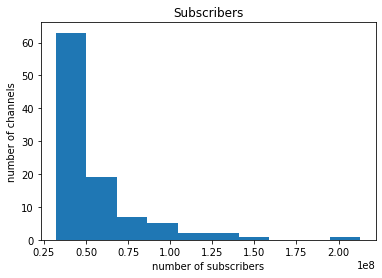

In [ ]:
plt.hist(df['subscribers'], bins=10)
plt.title('Subscribers')
plt.xlabel("number of subscribers")
plt.ylabel("number of channels")
plt.show()

**Show the number of subscribers to channels in each category**

In [ ]:
category_count = df['category'].value_counts()
category_count

Music                     34
Entertainment             19
People & Blogs            10
Gaming                     8
Education                  6
Film & Animation           5
Shows                      4
Comedy                     4
Sports                     3
News & Politics            3
How to & Style             2
Trailers                   1
Nonprofits & Activism      1
Name: category, dtype: int64

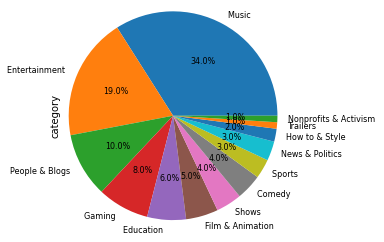

In [ ]:
pie_chart = df['category'].value_counts().plot.pie(autopct = '%1.1f%%', fontsize = 8, radius = 1.2)
plt.show()

**Show the correlation matrix**

In [ ]:
corr = df.corr()
corr

,subscribers,video views,video count,started,views per subscriber
subscribers,1.000000,0.845155,0.001657,-0.015502,0.224733
video views,0.845155,1.000000,0.088724,-0.018385,0.648431
video count,0.001657,0.088724,1.000000,-0.088179,0.138970
started,-0.015502,-0.018385,-0.088179,1.000000,0.040206
views per subscriber,0.224733,0.648431,0.138970,0.040206,1.000000


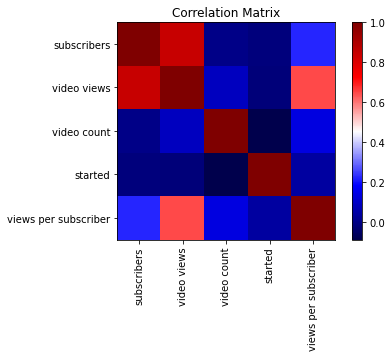

In [ ]:
plt.imshow(corr,cmap='seismic')
plt.title('Correlation Matrix')
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
plt.colorbar()
plt.show()

**Show the number of top Youtube channels started each year**

In [ ]:
df['started'].value_counts().sort_index(ascending=True)

1970     1
2005     4
2006    13
2007     7
2008     5
2009     5
2010     3
2011    10
2012    10
2013    10
2014    12
2015     7
2016     7
2017     5
2018     1
Name: started, dtype: int64

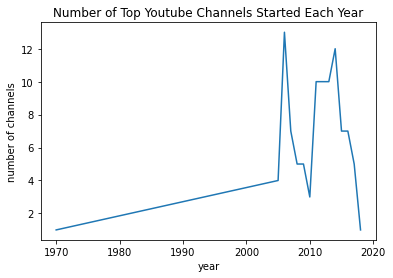

In [ ]:
line_plot = df['started'].value_counts().sort_index(ascending=True).plot()
plt.title('Number of Top Youtube Channels Started Each Year')
plt.xlabel('year')
plt.ylabel('number of channels')
plt.show()